<a href="https://colab.research.google.com/github/FairozAhmadSheikh/DeepLearning_Bootcamp_with_Tensor_Flow/blob/main/05_transfer_learning_fine_tunning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lets start with importing some helper functions from a script

In [1]:
!wget  https://raw.githubusercontent.com/FairozAhmadSheikh/DeepLearning_Bootcamp_with_Tensor_Flow/refs/heads/main/helper_functions/helper_functions.py

--2025-09-19 07:18:35--  https://raw.githubusercontent.com/FairozAhmadSheikh/DeepLearning_Bootcamp_with_Tensor_Flow/refs/heads/main/helper_functions/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6733 (6.6K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]   6.58K  --.-KB/s    in 0s      

2025-09-19 07:18:36 (71.4 MB/s) - ‘helper_functions.py’ saved [6733/6733]



In [2]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip

--2025-09-19 07:18:36--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.202.207, 173.194.203.207, 74.125.199.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.202.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 168546183 (161M) [application/zip]
Saving to: ‘10_food_classes_10_percent.zip’

10_food_classes_10_ 100%[===================>] 160.74M   152MB/s    in 1.1s    

2025-09-19 07:18:37 (152 MB/s) - ‘10_food_classes_10_percent.zip’ saved [168546183/168546183]



In [3]:
from helper_functions import unzip_data,walk_through_dir,plot_loss_curves,create_tensorboard_callback

In [4]:
unzip_data("10_food_classes_10_percent.zip")

In [5]:
walk_through_dir('10_food_classes_10_percent')

There are 2 directories and 0 images in '10_food_classes_10_percent'.
There are 10 directories and 0 images in '10_food_classes_10_percent/test'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/pizza'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/chicken_wings'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/grilled_salmon'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/ramen'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/hamburger'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/ice_cream'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/steak'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/fried_rice'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/sushi'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/ch

In [6]:
# Create  train and test directory
train_dir='10_food_classes_10_percent/train'
test_dir='10_food_classes_10_percent/test'

In [7]:
import tensorflow as tf

In [8]:
IMG_SIZE=(224,224)
BATCH_SIZE=32

In [9]:
# Instead of using ImageDataGenerator we use the below method
train_data_10_percent=tf.keras.preprocessing.image_dataset_from_directory(train_dir,label_mode='categorical',batch_size=BATCH_SIZE,image_size=IMG_SIZE)
test_data=tf.keras.preprocessing.image_dataset_from_directory(test_dir,batch_size=BATCH_SIZE,image_size=IMG_SIZE,label_mode='categorical')

Found 750 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [10]:
# Check out class names
train_data_10_percent.class_names

['chicken_curry',
 'chicken_wings',
 'fried_rice',
 'grilled_salmon',
 'hamburger',
 'ice_cream',
 'pizza',
 'ramen',
 'steak',
 'sushi']

In [11]:
# See an example of batch of data
for images,label in train_data_10_percent.take(1):
  print(images,label)

tf.Tensor(
[[[[2.13056122e+02 1.62795929e+02 1.03826532e+01]
   [2.10974487e+02 1.53974487e+02 8.12244797e+00]
   [1.97474487e+02 1.36030609e+02 0.00000000e+00]
   ...
   [4.57857361e+01 2.87857361e+01 2.17857361e+01]
   [4.98112297e+01 3.28112297e+01 2.48112297e+01]
   [4.94590530e+01 3.24590530e+01 2.44590530e+01]]

  [[2.16142868e+02 1.52979584e+02 2.34693050e-01]
   [2.09770401e+02 1.48714294e+02 2.29590893e-01]
   [2.03683670e+02 1.44770401e+02 9.02041149e+00]
   ...
   [4.68317375e+01 2.88878613e+01 2.47194901e+01]
   [4.77193756e+01 3.07193756e+01 2.37193756e+01]
   [5.07602005e+01 3.37602005e+01 2.67602024e+01]]

  [[2.25397964e+02 1.56178558e+02 3.39285755e+00]
   [2.08000000e+02 1.45571411e+02 7.13775730e+00]
   [2.01744904e+02 1.49551010e+02 4.97346992e+01]
   ...
   [4.67347946e+01 2.93776512e+01 2.71633644e+01]
   [4.65305786e+01 2.91734352e+01 2.49591503e+01]
   [4.57193260e+01 2.83621826e+01 2.41478977e+01]]

  ...

  [[2.09066315e+02 1.75280579e+02 2.07852051e+02]
   [2

Lets now create our first model with functional api

In [12]:
base_model = tf.keras.applications.EfficientNetB0(include_top=False)
base_model.trainable = False

inputs = tf.keras.layers.Input(shape=(IMG_SIZE + (3,)), name='Input_Layer')

# # Normalize if using resnet
# x = tf.keras.layers.Rescaling(1./255)(inputs)

# Pass normalized data to base model
x = base_model(inputs)
print(f'The shape after passing inputs through the base model {x.shape}')

# Global Average Pooling
x = tf.keras.layers.GlobalAveragePooling2D(name='Global_average_pooling_layer')(x)
print(f'The shape after passing inputs through the average pool layer {x.shape}')

# Output layer with softmax
output = tf.keras.layers.Dense(10, activation='softmax')(x)

# Build model
model_0 = tf.keras.Model(inputs, output)

16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
The shape after passing inputs through the base model (None, 7, 7, 1280)
The shape after passing inputs through the average pool layer (None, 1280)


In [13]:
# Combine inputs with outputs
model_0=tf.keras.Model(inputs,output)

# Compile the model
model_0.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

# Fit the model
history_10_percent=model_0.fit(train_data_10_percent,epochs=5,steps_per_epoch=len(train_data_10_percent),validation_data=test_data,validation_steps=int(0.25*len(test_data)),
                               callbacks=[create_tensorboard_callback(dir_name='transfer_learning',experiment_name='10-percent-feature-extarction')])

Saving TensorBoard log files to: transfer_learning/10-percent-feature-extarction/20250919-071849
Epoch 1/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 60s 1s/step - accuracy: 0.2203 - loss: 2.1807 - val_accuracy: 0.7023 - val_loss: 1.3809
Epoch 2/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 5s 190ms/step - accuracy: 0.7421 - loss: 1.2065 - val_accuracy: 0.8010 - val_loss: 0.9357
Epoch 3/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 3s 106ms/step - accuracy: 0.8351 - loss: 0.8345 - val_accuracy: 0.8207 - val_loss: 0.7541
Epoch 4/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 171ms/step - accuracy: 0.8427 - loss: 0.6504 - val_accuracy: 0.8405 - val_loss: 0.6379
Epoch 5/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 3s 104ms/step - accuracy: 0.9011 - loss: 0.5404 - val_accuracy: 0.8438 - val_loss: 0.5967


In [14]:
# evalute the model
model_0.evaluate(test_data)

79/79 ━━━━━━━━━━━━━━━━━━━━ 16s 204ms/step - accuracy: 0.8476 - loss: 0.5895


[0.5621510148048401, 0.8600000143051147]

In [15]:
# Check the layers in our base model
for layer_number, layer in enumerate(model_0.layers):
    print(layer_number,layer)

0 <InputLayer name=Input_Layer, built=True>
1 <Functional name=efficientnetb0, built=True>
2 <GlobalAveragePooling2D name=Global_average_pooling_layer, built=True>
3 <Dense name=dense, built=True>


In [16]:
# Model summary
model_0.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Input_Layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ efficientnetb0 (Functional)     │ (None, 7, 7, 1280)     │     4,049,571 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Global_average_pooling_layer    │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 10)             │        12,810 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,088,003 (15.59 MB)

 Trainable params: 12,810 (50.04 KB)

 Non-trainable params: 4,049,571 (15.45 MB)

 Optimizer params: 25,622 (100.09 KB)

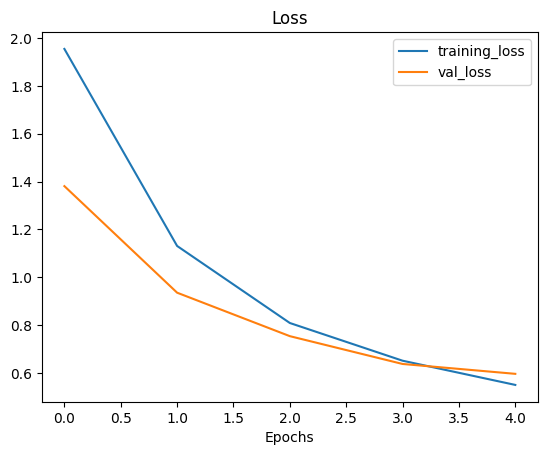

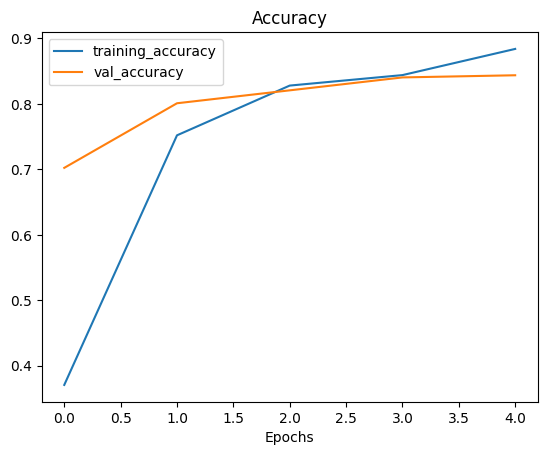

In [17]:
# plot loss curves
plot_loss_curves(history_10_percent)

In [18]:
# creating a another model now
base_model_1=tf.keras.applications.EfficientNetB7(include_top=False)
base_model_1.trainable=False
inputs=tf.keras.layers.Input(shape=(224,224,3))
# x=tf.keras.layers.Rescaling(1./255)(inputs)
x=base_model_1(inputs)
x=tf.keras.layers.GlobalAvgPool2D(name='gloabal_avg_pool')(x)
outputs=tf.keras.layers.Dense(10,activation='softmax')(x)

258076736/258076736 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [19]:
model_1=tf.keras.Model(inputs,outputs)
model_1.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
                optimizer='adam',
                metrics=['accuracy'])
history_model_1_b7=model_1.fit(train_data_10_percent,epochs=5,steps_per_epoch=len(train_data_10_percent),validation_data=test_data,validation_steps=len(test_data),
                               callbacks=[create_tensorboard_callback(dir_name='transfer_learning',experiment_name='efficemt_net_b7')])

Saving TensorBoard log files to: transfer_learning/efficemt_net_b7/20250919-072034
Epoch 1/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 239s 6s/step - accuracy: 0.4301 - loss: 1.8954 - val_accuracy: 0.8056 - val_loss: 0.9535
Epoch 2/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 24s 1s/step - accuracy: 0.8151 - loss: 0.8893 - val_accuracy: 0.8416 - val_loss: 0.6635
Epoch 3/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 41s 1s/step - accuracy: 0.8592 - loss: 0.6264 - val_accuracy: 0.8560 - val_loss: 0.5683
Epoch 4/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 42s 1s/step - accuracy: 0.8969 - loss: 0.4893 - val_accuracy: 0.8544 - val_loss: 0.5247
Epoch 5/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 24s 1s/step - accuracy: 0.9038 - loss: 0.4482 - val_accuracy: 0.8560 - val_loss: 0.4950


In [20]:
# Model Evaluation
model_1.evaluate(test_data)

79/79 ━━━━━━━━━━━━━━━━━━━━ 18s 229ms/step - accuracy: 0.8478 - loss: 0.5119


[0.4950188398361206, 0.8560000061988831]

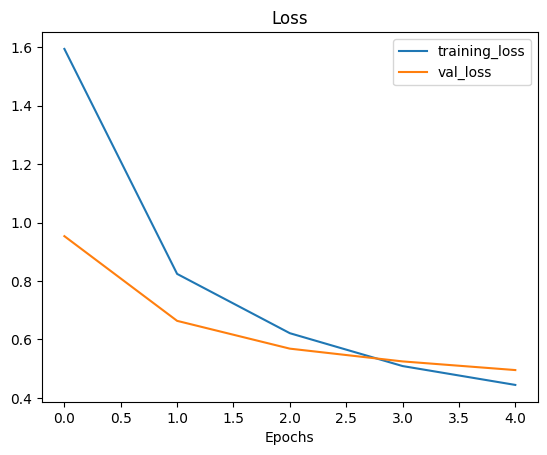

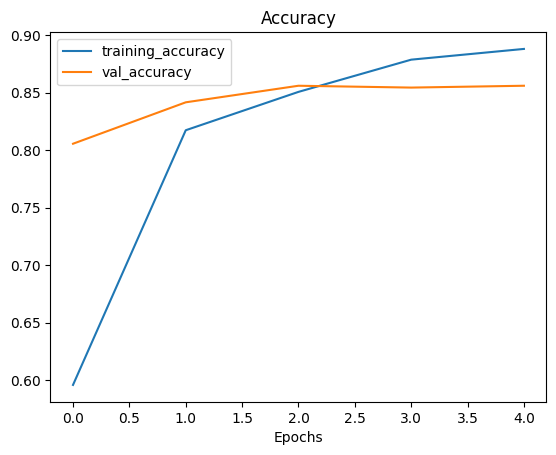

In [21]:
plot_loss_curves(history_model_1_b7)

# Get a Feature vector from trained model
# lets see how global average pooling layer

In [24]:
import tensorflow as tf

In [25]:
# Define input shape
input_shape=(1,4,4,3)

# Create a random tensor
tf.random.set_seed(42)
input_tensor=tf.random.normal(input_shape)
print(f'Random input tensor :{input_tensor.shape}')

Random input tensor :(1, 4, 4, 3)


In [26]:
# Pass it through the global average pooling
global_average_pooled_layer=tf.keras.layers.GlobalAveragePooling2D()(input_tensor)
print(f'Global average pooled shape {global_average_pooled_layer.shape}')

Global average pooled shape (1, 3)


In [28]:
print(f"input Tensor orignal \n {input_tensor}")

input Tensor orignal 
 [[[[ 0.3274685  -0.8426258   0.3194337 ]
   [-1.4075519  -2.3880599  -1.0392479 ]
   [-0.5573232   0.539707    1.6994323 ]
   [ 0.28893656 -1.5066116  -0.2645474 ]]

  [[-0.59722406 -1.9171132  -0.62044144]
   [ 0.8504023  -0.40604794 -3.0258412 ]
   [ 0.9058464   0.29855987 -0.22561555]
   [-0.7616443  -1.8917141  -0.93847126]]

  [[ 0.77852213 -0.47338894  0.97772694]
   [ 0.24694404  0.20573746 -0.52562326]
   [ 0.32410017  0.02545409 -0.10638496]
   [-0.63694745  1.1603122   0.2507359 ]]

  [[-0.41728503  0.4012578  -1.4145443 ]
   [-0.5931857  -1.6617213   0.33567193]
   [ 0.10815628  0.23479679 -0.56668764]
   [-0.35819843  0.88698614  0.52744764]]]]


In [29]:
print(f'Global average pooled tensor \n {global_average_pooled_layer}')

Global average pooled tensor 
 [[-0.09368646 -0.45840448 -0.2885598 ]]


Lets replicate the Global Average pooling 2d

In [31]:
tf.reduce_mean(input_tensor,axis=[1,2]).numpy()

array([[-0.09368646, -0.45840448, -0.2885598 ]], dtype=float32)